# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID='+weather_api_key
city_url = url+'&q='+'dallas'
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -96.7836, 'lat': 32.7668},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 28.21,
  'feels_like': 29.53,
  'temp_min': 25.8,
  'temp_max': 30.37,
  'pressure': 1003,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 6.69, 'deg': 200, 'gust': 11.32},
 'clouds': {'all': 40},
 'dt': 1678566781,
 'sys': {'type': 2,
  'id': 2075302,
  'country': 'US',
  'sunrise': 1678538577,
  'sunset': 1678581098},
 'timezone': -21600,
 'id': 4684904,
 'name': 'Dallas',
 'cod': 200}

In [6]:
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']

'scattered clouds'

In [7]:
# # Set the API base URL
# url = 'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID='+weather_api_key

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = url+'&q='+city
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['clouds']['all']
#         city_wind = city_weather['wind']['speed']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | mahon
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | shashi
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | muisne
Processing Record 18 of Set 1 | walvis bay
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | broome
Processi

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,13.82,66,50,0.45,AU,1678567945
1,punta arenas,-53.1500,-70.9167,15.06,36,0,7.20,CL,1678567946
2,esperance,-33.8667,121.9000,15.61,92,30,4.22,AU,1678567947
3,saint-philippe,-21.3585,55.7679,24.77,85,99,5.14,RE,1678567948
4,arraial do cabo,-22.9661,-42.0278,26.92,69,40,5.66,BR,1678567824


In [12]:
# # Export the City_Data into a csv
# city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,13.82,66,50,0.45,AU,1678567945
1,punta arenas,-53.1500,-70.9167,15.06,36,0,7.20,CL,1678567946
2,esperance,-33.8667,121.9000,15.61,92,30,4.22,AU,1678567947
3,saint-philippe,-21.3585,55.7679,24.77,85,99,5.14,RE,1678567948
4,arraial do cabo,-22.9661,-42.0278,26.92,69,40,5.66,BR,1678567824


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

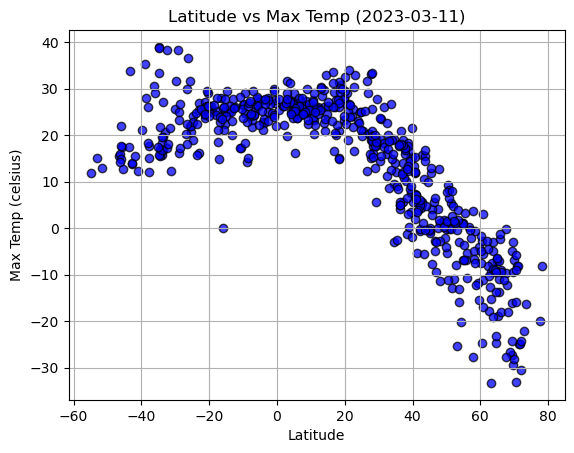

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("Latitude vs Max Temp (2023-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

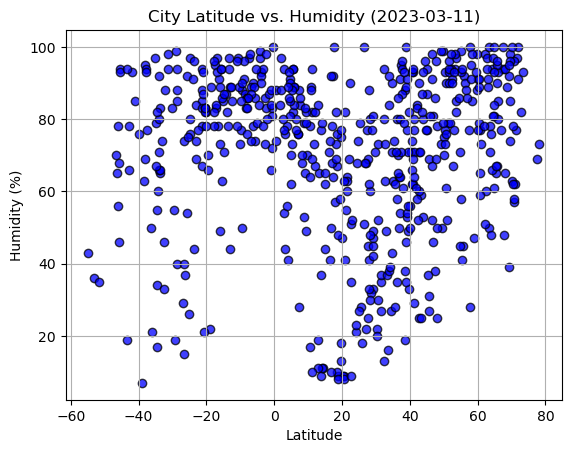

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

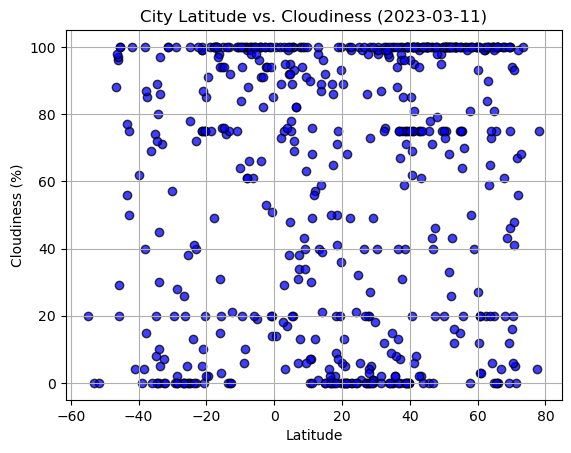

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

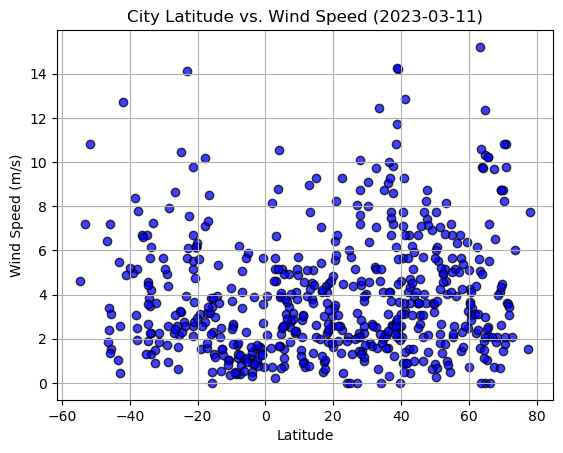

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-03-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def regress(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,mahon,39.8885,4.2658,15.31,82,0,4.63,ES,1678567948
7,margate,51.3813,1.3862,5.50,79,100,1.79,GB,1678567949
11,shashi,30.3072,112.2447,14.38,22,99,8.01,CN,1678567950
14,muisne,0.6000,-80.0333,25.36,88,100,2.19,EC,1678567951
16,kapaa,22.0752,-159.3190,24.15,69,100,2.57,US,1678567952


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,13.82,66,50,0.45,AU,1678567945
1,punta arenas,-53.1500,-70.9167,15.06,36,0,7.20,CL,1678567946
2,esperance,-33.8667,121.9000,15.61,92,30,4.22,AU,1678567947
3,saint-philippe,-21.3585,55.7679,24.77,85,99,5.14,RE,1678567948
4,arraial do cabo,-22.9661,-42.0278,26.92,69,40,5.66,BR,1678567824


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.807570701674899


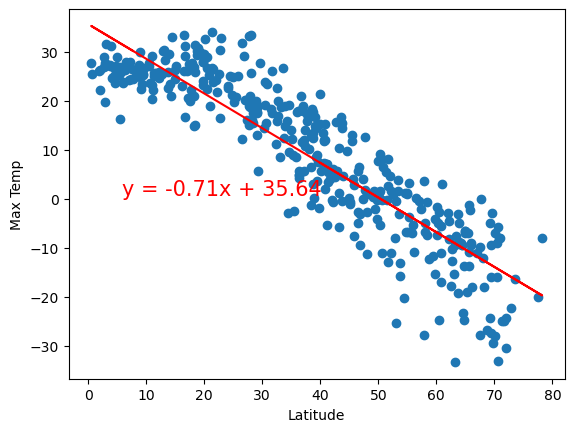

In [12]:
# Linear regression on Northern Hemisphere
regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp')

The r-value is: 0.11617253693124473


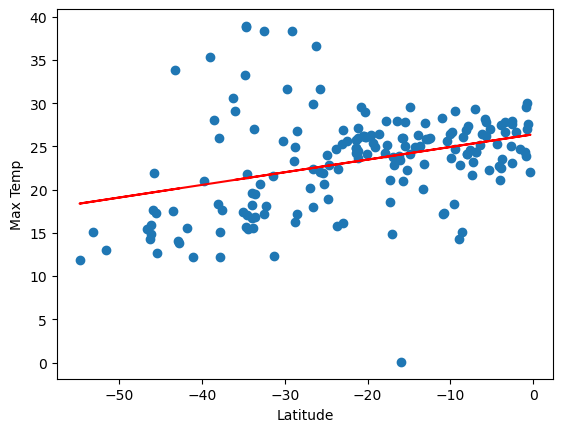

In [13]:
# Linear regression on Southern Hemisphere
regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


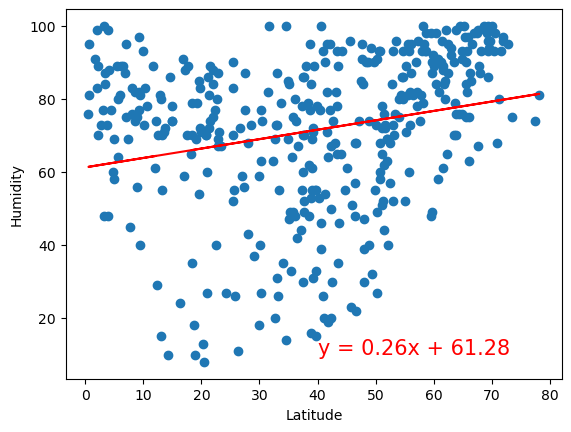

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


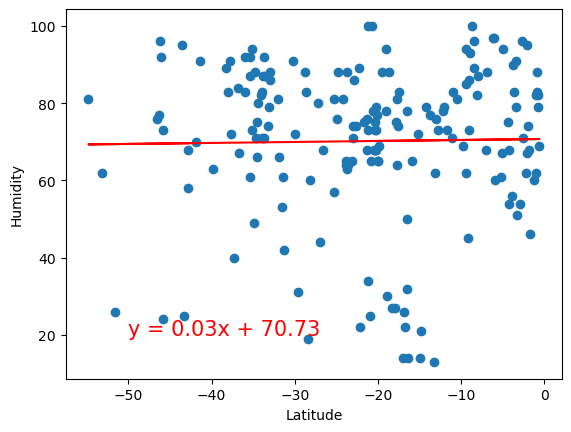

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


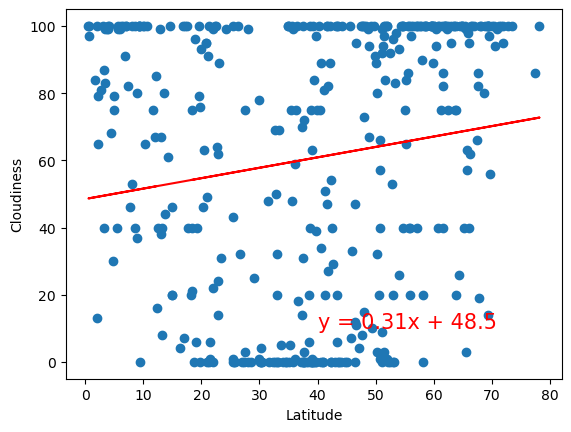

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


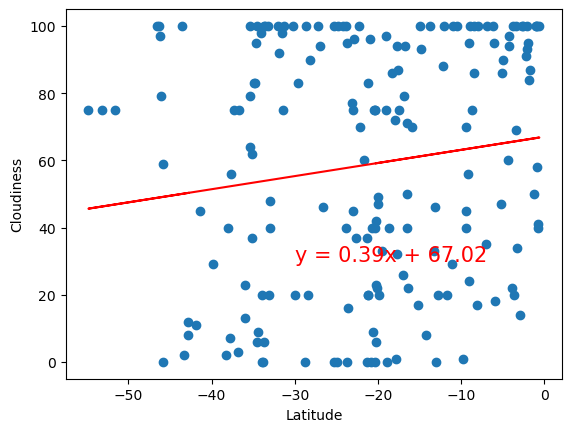

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


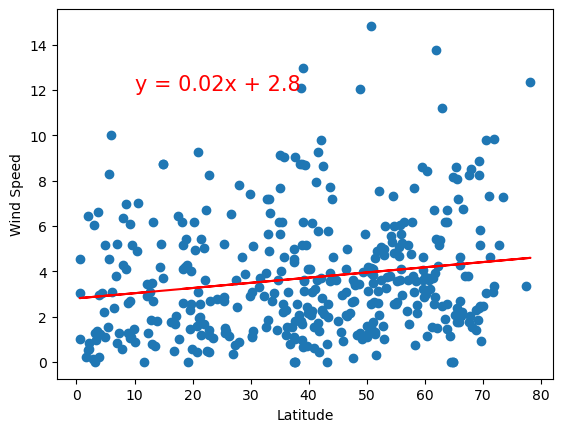

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


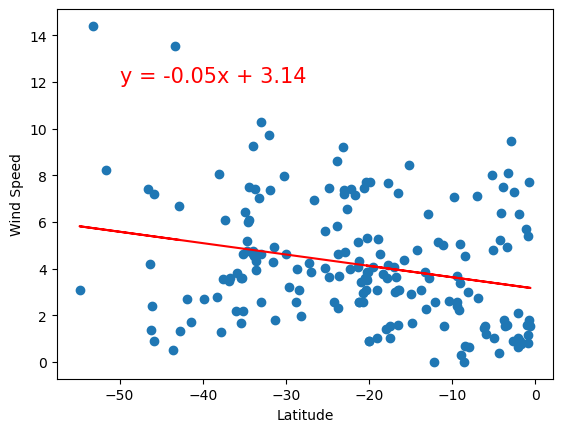

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE